# Мартьянова Александра Евгеньевна, курс «Data Science», ВКР

# Часть 2. Модели Data Science

### Загрузка библиотек

In [1]:
# Загрузка разных библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

### 1. Подготовка и предобработка данных

Исходный датасет

In [2]:
# Загрузка в объект DataFrame файла X_bp.xlsx, метод read_excel
x_bp = pd.read_excel('X_bp.xlsx', index_col = 0)
x_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [3]:
# Определение количества строк и столбцов объекта, метод shape
x_bp.shape

(1023, 10)

In [4]:
# Вывод сведений об объекте DataFrame, метод info()
x_bp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [5]:
# Загрузка в объект DataFrame файла X_nup.xlsx, метод read_excel
x_nup = pd.read_excel('X_nup.xlsx', index_col = 0)
x_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0
3.0,0.0,5.0,47.0
4.0,0.0,5.0,57.0


In [6]:
# Определение количества строк и столбцов объекта, метод shape
x_nup.shape

(1040, 3)

In [7]:
# Вывод сведений об объекте DataFrame, метод info()
x_nup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


In [8]:
# соединение объектов DataFrame, метод merge, объединение по индексу, тип объединения INNER
df = x_bp.merge(x_nup, how = 'inner', left_index = True, right_index = True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [9]:
# Вывод сведений о новом объекте DataFrame df, метод info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

Вывод: соединение произведено по индексам, и часть данных была отброшена при соединении датасетов в общий новый датасет. Тип данных во всех колонках - float64.

In [10]:
# Изменение типа данных индекса, метод astype('int')
df.index = df.index.astype('int')
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


Вывод: индексы - целые числа

In [11]:
# Проверка наличия пропусков типа NULL в объекте DataFrame, методы isnull() и sum()
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропуски в датасете отсутствуют.

In [12]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
df.duplicated().sum()

0

Вывод: дубликаты в датасете отсутствуют

ПРЕДВАРИТЕЛЬНОЕ ЗАКЛЮЧЕНИЕ ПО ДАТАСЕТУ: датасет качественный: пропуски и дубликаты в датасете отсутствуют, вероятно он подвергался какой-то обработке заранее

In [13]:
# Проверка количества уникальных значений в каждом столбце датасета df, метод nunique()
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Вывод: в колонке 'Угол нашивки, град' всего два значения, в остальных столбцах гораздо больше, например в столбце 'модуль упругости, ГПа' таковых 1020 из 1023

In [14]:
# Определение уникальных значений в столбце 'Угол нашивки, град', метод unique()
df['Угол нашивки, град'].unique()

array([ 0., 90.])

Вывод: категориальный параметр 'Угол нашивки, град' имеет всего два уровня, может рассматриваться как порядковый и для дальнейшей обработки подвергается ранжированию

In [15]:
# Подсчет количества строк по уникальным значениям столбца 'Угол нашивки, град', метод count()
df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count()

520

In [16]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df.dtypes['Угол нашивки, град']

dtype('float64')

In [17]:
#  Ранжирование переменной 'Угол нашивки, град' и изменение типа данных, метод astype('int')
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

In [18]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df.dtypes['Угол нашивки, град']

dtype('int32')

In [19]:
# Вывод данных датасета df
df.tail()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074
1022,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342,1,6.078902,77.434468


In [20]:
# Вывод сведений о названиях столбцов датасета df, метод columns
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [21]:
# Вывод сведений об объекте DataFrame df, метод info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int32  
 11  Шаг нашивки      

In [22]:
# Проверка количества уникальных значений в каждом столбце датасета df, метод nunique()
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [23]:
# Описательная статистика датасета df, метод describe()
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,0.491691,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,0.500175,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,1.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,1.000000,14.440522,103.988901


###### Построим графики рассеяния, распределия переменных и "ящики с усами"

In [24]:
# Попарные графики рассеяния
#sns.pairplot(df, height=3)

Попарные графики рассеяния не показывают какой-либо зависимости между параметрами

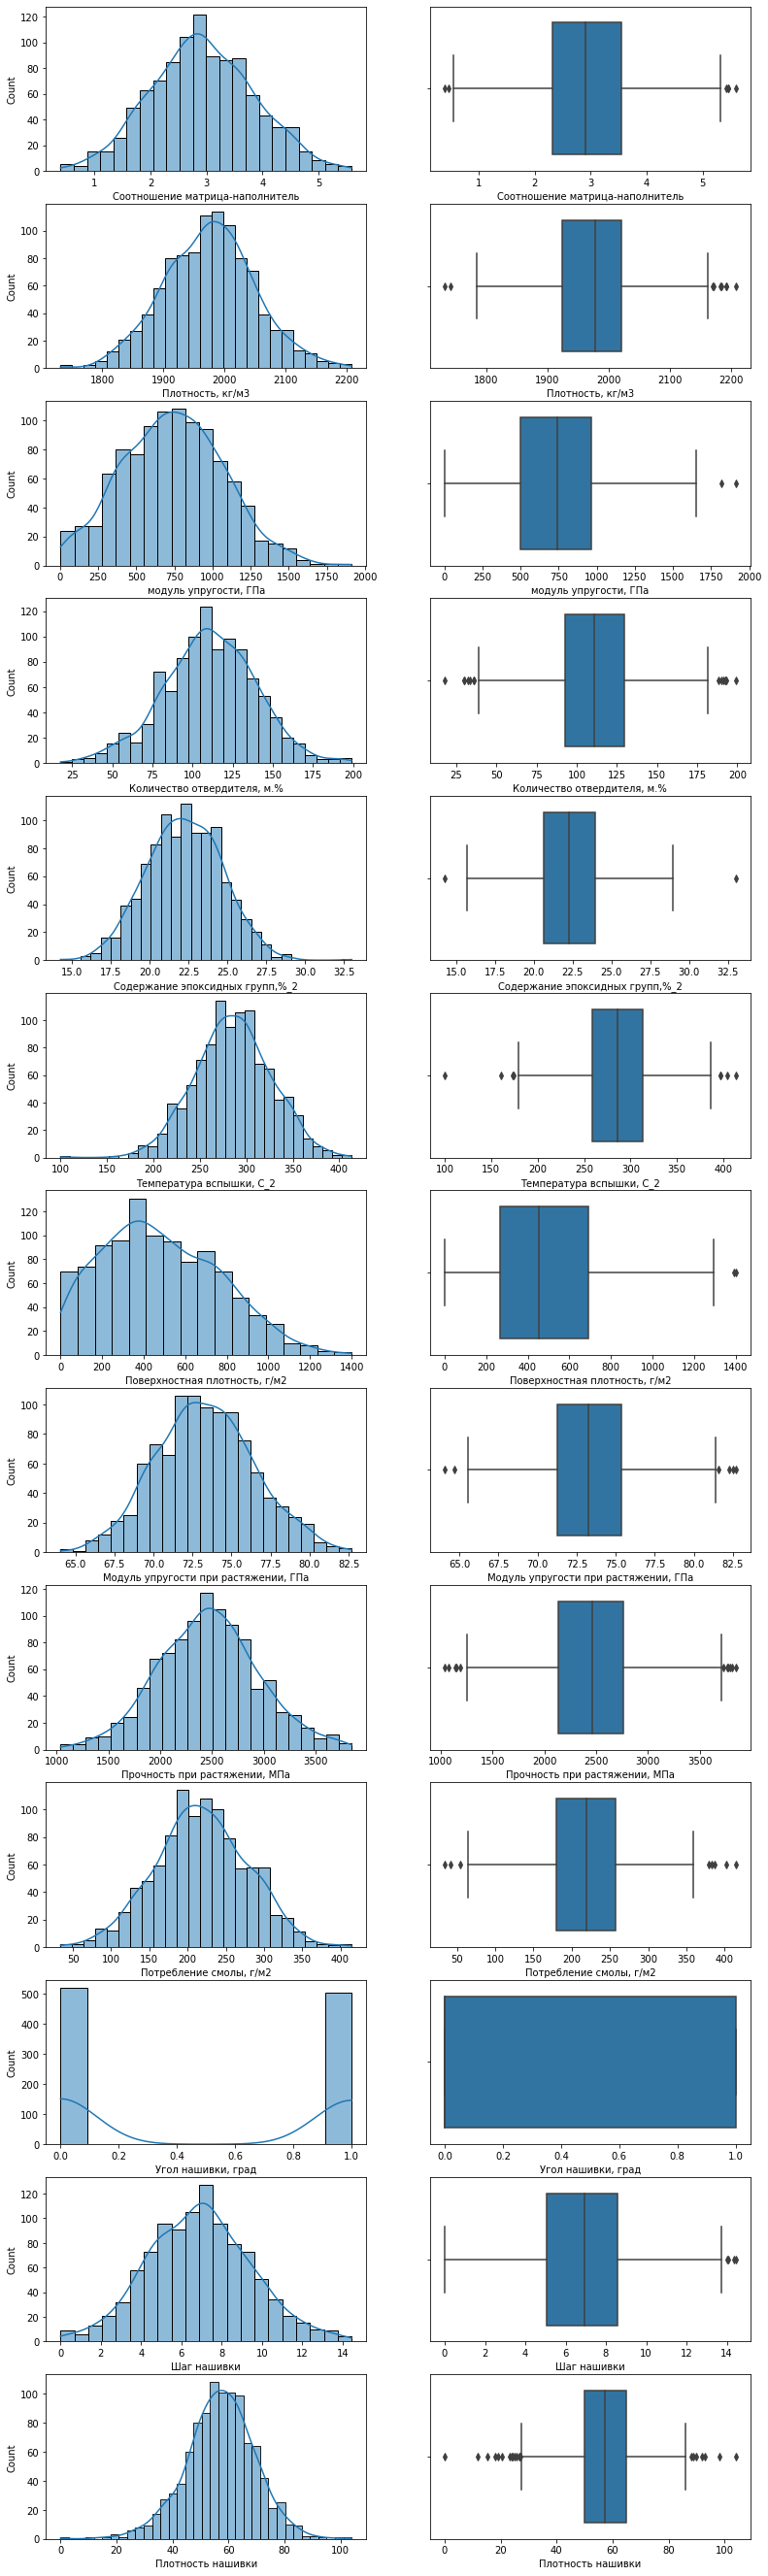

In [25]:
# Графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Вывод: на первый взгляд, судя по графикам распределения переменных, кроме 'модуль упругости, ГПа', 'Поверхностная плотность, г/м2', 'Угол нашивки' распределения всех остальных параметров близки к нормальным. Судя по графикам рассеяния и графикам "ящики с усами", имеются выбросы.

Требуется дополнительно оценить нормальность распределения параметров по статистическому критерию и убрать существующие выбросы.

Требуется оценить также корреляцию параметров между собой, а для параметров, имеющих статистически значимую корреляцию, выполнить построение модели статистической регрессии и оценить ее статистическую адекватность.

###### Очистка данных от выбросов: 

Не производится с целью максимального сохранения данных

### 2. Нормализация значений параметров с помощью метода MinMaxScaler

In [26]:
# Загрузка MinMaxScaler из библиотеки sklearn
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Применение  MinMaxScaler для нормализации датасета df
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)

In [28]:
# Описательная статистика нормализованного датасета df_norm
df_norm.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,0.488427,0.512533,0.386301,0.512273,0.426215,0.593354,0.344638,0.497880,0.508634,0.484838,0.491691,0.477768,0.549616
std,0.175541,0.154890,0.172978,0.156147,0.128370,0.130695,0.201092,0.167435,0.172724,0.156875,0.500175,0.177519,0.118772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370696,0.404175,0.260652,0.412240,0.338919,0.507756,0.190296,0.386030,0.390881,0.382955,0.000000,0.351790,0.478890
50%,0.483912,0.516497,0.386165,0.512240,0.425487,0.593401,0.322574,0.494672,0.506003,0.486875,0.000000,0.478940,0.551423
75%,0.608045,0.608413,0.502528,0.618003,0.517842,0.679924,0.495105,0.606751,0.615432,0.587411,1.000000,0.594597,0.624537
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Попарные графики рассеяния после нормализации
# sns.pairplot(df_norm, height=3)

In [30]:
# Параметр 'Угол нашивки' - категориальный, поэтому его исключаем при построении матрицы корреляции по критерию Пирсона
df_dnorm=df_norm[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]
df_dnorm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.346248,0.548135
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.480312,0.239516,0.628535,0.452161
1019,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.470745,0.220404,0.731664,0.516890
1020,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.578340,0.532590,0.288158,0.650355
1021,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.368070,0.428909,0.437186,0.560262


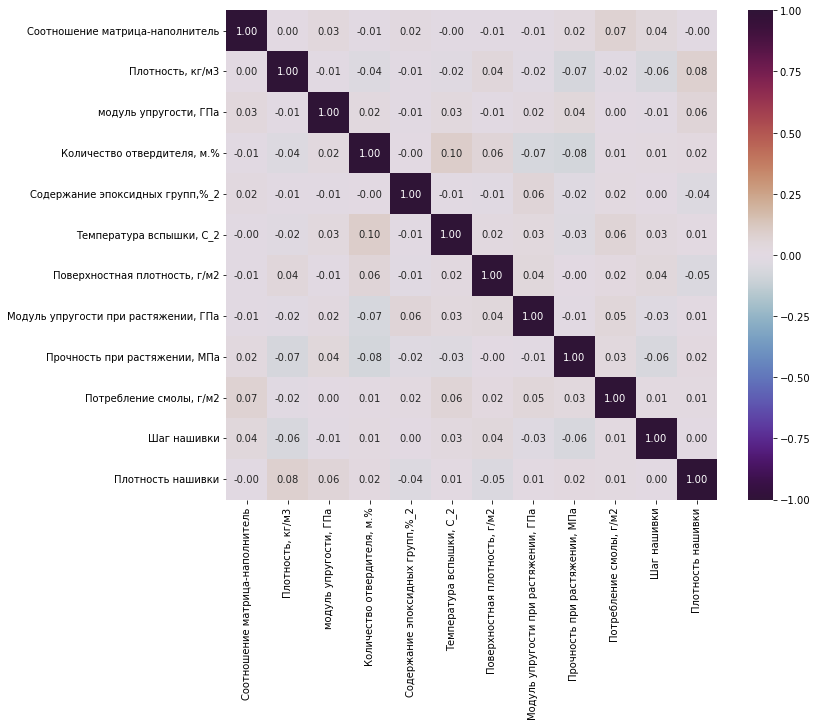

In [31]:
# Матрица корреляции по Пирсону после нормализации
corr = df_dnorm.corr() # Пирсон по умолчанию
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

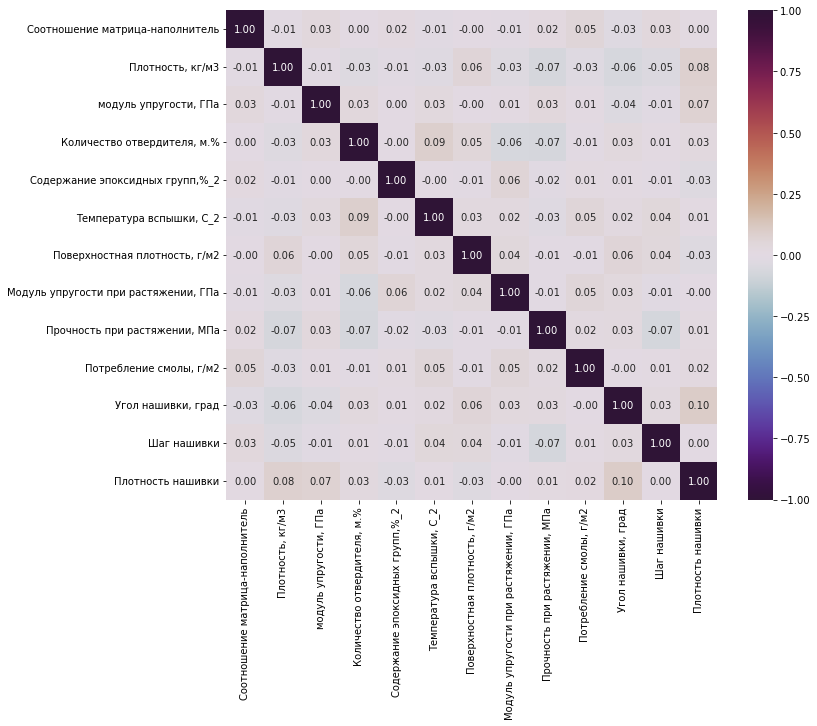

In [32]:
# Матрица корреляции по Спирмену после нормализации
corr = df_norm.corr(method = 'spearman') # Спирмен
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Вывод: судя по матрицам корреляции, построенной на основании корреляции по Пирсону для количественных данных и Спирмена для количественных и категориальных данных, коэффициенты корреляции
после очистки от выбросов и нормализации параметров мало изменились.

In [33]:
# Переименование и вывод датасета df_norm
df = df_norm
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.548135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.480312,0.239516,1.0,0.628535,0.452161
1019,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.470745,0.220404,1.0,0.731664,0.516890
1020,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.578340,0.532590,1.0,0.288158,0.650355
1021,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.368070,0.428909,1.0,0.437186,0.560262


### 3. Модели для прогноза модуля упругости при растяжении и прочности при растяжении

In [34]:
# Загрузка модулей библиотеки sklearn для регрессоров и других библиотек
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

###### Разбиение данных на обучающую и тестовую выборки

In [35]:
# Назначение переменных для создания моделей
x_upr = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df[['Модуль упругости при растяжении, ГПа']]
y_pr = df[['Прочность при растяжении, МПа']]
# Разбиение данных на обучающую и тестовую выборки
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=5)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=5)

###### Метод К ближайших соседей

In [36]:
# Регрессор KNeighborsRegressor() для расчета методом K-ближайших соседей,
# используются унифицированные веса и настройки алгоритма по умолчанию
knr = KNeighborsRegressor()
knr_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
# используется поиск по сетке GridSearchCV для upr
GSCV_knr_upr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_upr.fit(X_train_upr, y_train_upr)
GSCV_knr_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 67, 'weights': 'uniform'}

In [37]:
# Поиск по лучшей модели и вывод результатов для upr
knr_upr = GSCV_knr_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {knr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score KNR для модуля упругости при растяжении: -0.007


In [38]:
# Создание объекта pandas DataFrame()
models = pd.DataFrame()

In [39]:
# Запись результатов расчета в DataFrame()
knr_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, knr_upr.predict(X_test_upr)), 
   'R2 score': knr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [40]:
# Соединение объектов DataFrame()
models = pd.concat([models, knr_upr_result])

In [41]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.143084,-0.007


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [42]:
# Используется поиск по сетке GridSearchCV для pr
GSCV_knr_pr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_pr.fit(X_train_pr, y_train_pr)
GSCV_knr_pr.best_params_

{'algorithm': 'auto', 'n_neighbors': 167, 'weights': 'uniform'}

In [43]:
# Поиск по лучшей модели и вывод результатов для pr
knr_pr = GSCV_knr_pr.best_estimator_
print(f'R2-score KNR для прочности при растяжении: {knr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score KNR для прочности при растяжении: -0.028


In [44]:
# Запись результатов расчета в DataFrame()
knr_pr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, knr_pr.predict(X_test_pr)), 
   'R2 score': knr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [45]:
# Соединение объектов DataFrame()
models = pd.concat([models, knr_pr_result])

In [46]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.143084,-0.007
Прочность при растяжении,KNeighborsRegressor_pr,0.135928,-0.028


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Стохастический градиентный спуск

In [47]:
# Регрессор SGDRegressor() для расчета методом стохастического градиентного спуска,
# используются настройки алгоритма по умолчанию
sgd = SGDRegressor()
sgd_params = {'loss' : ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
          'penalty' : ['elasticnet', 'l2', 'l1'],
          'alpha' : [0.0001, 0.001, 0.01, 0.0002, 0.002],
          'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
          'epsilon' : [0.1, 0.01, 0.2, 0.02]
          }
# используется поиск по сетке GridSearchCV для upr
GSCV_sgd_upr = GridSearchCV(sgd, sgd_params, cv=10, verbose=0)
GSCV_sgd_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_sgd_upr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

{'alpha': 0.01,
 'epsilon': 0.1,
 'learning_rate': 'optimal',
 'loss': 'huber',
 'penalty': 'l1'}

In [48]:
# Поиск по лучшей модели и вывод результатов для upr
sgd_upr = GSCV_sgd_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {sgd_upr.score(X_test_upr, y_test_upr).round(3)}')
print(mean_absolute_error(y_test_upr, sgd_upr.predict(X_test_upr)))

R2-score KNR для модуля упругости при растяжении: -0.0
0.14212468692034352


In [49]:
# Запись результатов расчета в DataFrame()
sgd_upr_result = pd.DataFrame({
   'Model': 'SGDRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, sgd_upr.predict(X_test_upr)), 
   'R2 score': sgd_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [50]:
# Соединение объектов DataFrame()
models = pd.concat([models, sgd_upr_result])

In [51]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.143084,-0.007
Прочность при растяжении,KNeighborsRegressor_pr,0.135928,-0.028
Модуль упругости при растяжении,SGDRegressor_upr,0.142125,-0.000


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [52]:
# Используется поиск по сетке GridSearchCV для pr
GSCV_sgd_pr = GridSearchCV(sgd, sgd_params, cv=10)
GSCV_sgd_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_sgd_pr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

{'alpha': 0.002,
 'epsilon': 0.02,
 'learning_rate': 'optimal',
 'loss': 'huber',
 'penalty': 'l1'}

In [53]:
# Поиск по лучшей модели и вывод результатов для pr
sgd_pr = GSCV_sgd_pr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {sgd_pr.score(X_test_pr, y_test_pr).round(3)}')
print(mean_absolute_error(y_test_pr, sgd_pr.predict(X_test_pr)))

R2-score KNR для модуля упругости при растяжении: -0.022
0.1350530172147434


In [54]:
# Запись результатов расчета в DataFrame()
sgd_pr_result = pd.DataFrame({
   'Model': 'SGDRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, sgd_pr.predict(X_test_pr)), 
   'R2 score': sgd_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [55]:
# Соединение объектов DataFrame()
models = pd.concat([models, sgd_pr_result])

In [56]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.143084,-0.007
Прочность при растяжении,KNeighborsRegressor_pr,0.135928,-0.028
Модуль упругости при растяжении,SGDRegressor_upr,0.142125,-0.000
Прочность при растяжении,SGDRegressor_pr,0.135053,-0.022


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Линейная регрессия

In [57]:
# Регрессор LinearRegression() для расчета методом линейной регрессии,
# используются настройки алгоритма по умолчанию
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
# используется поиск по сетке GridSearchCV для upr
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [58]:
# Поиск по лучшей модели и вывод результатов для upr
lr_upr = GSCV_lr_upr.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score LR для модуля упругости при растяжении: -0.025


In [59]:
# Запись результатов расчета в DataFrame()
lr_upr_result = pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [60]:
# Соединение объектов DataFrame()
models = pd.concat([models, lr_upr_result])

In [61]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.143084,-0.007
Прочность при растяжении,KNeighborsRegressor_pr,0.135928,-0.028
Модуль упругости при растяжении,SGDRegressor_upr,0.142125,-0.000
Прочность при растяжении,SGDRegressor_pr,0.135053,-0.022
Модуль упругости при растяжении,LinearRegression_upr,0.144489,-0.025


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [62]:
# используется поиск по сетке GridSearchCV для pr
GSCV_lr_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_pr.fit(X_train_pr, y_train_pr)
GSCV_lr_pr.best_params_

{'fit_intercept': 'True'}

In [63]:
# Поиск по лучшей модели и вывод результатов для pr
lr_pr = GSCV_lr_pr.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score LR для прочности при растяжении: -0.047


In [64]:
# Запись результатов расчета в DataFrame()
lr_pr_result = pd.DataFrame({
   'Model': 'LinearRegression_pr', 
   'MAE': mean_absolute_error(y_test_pr, lr_pr.predict(X_test_pr)), 
   'R2 score': lr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [65]:
# Соединение объектов DataFrame()
models = pd.concat([models, lr_pr_result])

In [66]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.143084,-0.007
Прочность при растяжении,KNeighborsRegressor_pr,0.135928,-0.028
Модуль упругости при растяжении,SGDRegressor_upr,0.142125,-0.000
Прочность при растяжении,SGDRegressor_pr,0.135053,-0.022
Модуль упругости при растяжении,LinearRegression_upr,0.144489,-0.025
Прочность при растяжении,LinearRegression_pr,0.137698,-0.047


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель дает прогноз даже хуже, чем простое усреднение

###### Случайный лес

In [67]:
# Регрессор RandomForestRegressor() для расчета методом случайного леса
# испальзуются настройки алгоритма по умолчанию
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
# Используется поиск по RandomizedSearchCV для upr
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, np.ravel(y_train_upr))
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 210,
 'min_samples_split': 20,
 'min_samples_leaf': 4,
 'max_depth': 1,
 'criterion': 'absolute_error',
 'bootstrap': 'True'}

In [68]:
# Поиск по лучшей модели и вывод результатов для upr
rfr_upr = RSCV_rfr_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score RFR для модуля упругости при растяжении: 0.001


In [69]:
# Запись результатов расчета в DataFrame()
rfr_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr)), 
   'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [70]:
# Соединение объектов DataFrame()
models = pd.concat([models, rfr_upr_result])

In [71]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.143084,-0.007
Прочность при растяжении,KNeighborsRegressor_pr,0.135928,-0.028
Модуль упругости при растяжении,SGDRegressor_upr,0.142125,-0.000
Прочность при растяжении,SGDRegressor_pr,0.135053,-0.022
Модуль упругости при растяжении,LinearRegression_upr,0.144489,-0.025
Прочность при растяжении,LinearRegression_pr,0.137698,-0.047
Модуль упругости при растяжении,RandomForestRegressor_upr,0.142093,0.001


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель дает прогноз даже хуже, чем простое усреднение

In [72]:
# Используется поиск по RandomizedSearchCV() для pr
RSCV_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_pr.fit(X_train_pr, np.ravel(y_train_pr))
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 680,
 'min_samples_split': 25,
 'min_samples_leaf': 5,
 'max_depth': 3,
 'criterion': 'absolute_error',
 'bootstrap': 'True'}

In [73]:
# Поиск по лучшей модели и вывод результатов для pr
rfr_pr = RSCV_rfr_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score RFR для прочности при растяжении: -0.026


In [74]:
# Запись результатов расчета в DataFrame()
rfr_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)), 
   'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [75]:
# Соединение объектов DataFrame()
models = pd.concat([models, rfr_pr_result])

In [76]:
# Вывод результатов в кросс-таблицу
models 

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.143084,-0.007
Прочность при растяжении,KNeighborsRegressor_pr,0.135928,-0.028
Модуль упругости при растяжении,SGDRegressor_upr,0.142125,-0.000
Прочность при растяжении,SGDRegressor_pr,0.135053,-0.022
Модуль упругости при растяжении,LinearRegression_upr,0.144489,-0.025
Прочность при растяжении,LinearRegression_pr,0.137698,-0.047
Модуль упругости при растяжении,RandomForestRegressor_upr,0.142093,0.001
Прочность при растяжении,RandomForestRegressor_pr,0.136331,-0.026


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Многослойный перцептрон

In [78]:
# Регрессор MLPRegressor() для расчета с помощью создания многослойного перцептрона
# используются настройки алгоритма
mlpr = MLPRegressor(random_state=5)
mlpr_params = {
    'hidden_layer_sizes' : [(64, 32, 12), (12, 12, 12, 12, 12),
                            (32, 32, 16, 8), (16, 16, 8)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [300],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}

In [79]:
# используется поиск по сетке GridSearchCV для upr
GSCV_mlpr_upr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_mlpr_upr.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (12, 12, 12, 12, 12),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'sgd'}

In [80]:
# Поиск по лучшей модели и вывод результатов для upr
mlpr_upr = GSCV_mlpr_upr.best_estimator_
print(f'R2-score MLPR для модуля упругости при растяжении: {mlpr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score MLPR для модуля упругости при растяжении: -0.0


In [81]:
# Запись результатов расчета в DataFrame()
mlpr_upr_result = pd.DataFrame({
   'Model': 'MLPRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, mlpr_upr.predict(X_test_upr)), 
   'R2 score': mlpr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [82]:
# Соединение объектов DataFrame()
models = pd.concat([models, mlpr_upr_result])
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.143084,-0.007
Прочность при растяжении,KNeighborsRegressor_pr,0.135928,-0.028
Модуль упругости при растяжении,SGDRegressor_upr,0.142125,-0.000
Прочность при растяжении,SGDRegressor_pr,0.135053,-0.022
Модуль упругости при растяжении,LinearRegression_upr,0.144489,-0.025
Прочность при растяжении,LinearRegression_pr,0.137698,-0.047
Модуль упругости при растяжении,RandomForestRegressor_upr,0.142093,0.001
Прочность при растяжении,RandomForestRegressor_pr,0.136331,-0.026
Модуль упругости при растяжении,MLPRegressor_upr,0.142147,-0.000


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [83]:
# используется поиск по сетке GridSearchCV для pr
GSCV_mlpr_pr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_mlpr_pr.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (64, 32, 12),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'sgd'}

In [84]:
# Поиск по лучшей модели и вывод результатов для pr
mlpr_pr = GSCV_mlpr_pr.best_estimator_
print(f'R2-score MLPR для прочности при растяжении: {mlpr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score MLPR для прочности при растяжении: -0.061


In [85]:
# Запись результатов расчета в DataFrame()
mlpr_pr_result = pd.DataFrame({
   'Model': 'MLPRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, mlpr_pr.predict(X_test_pr)), 
   'R2 score': mlpr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [86]:
# Соединение объектов DataFrame()
models = pd.concat([models, mlpr_pr_result])
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.143084,-0.007
Прочность при растяжении,KNeighborsRegressor_pr,0.135928,-0.028
Модуль упругости при растяжении,SGDRegressor_upr,0.142125,-0.000
Прочность при растяжении,SGDRegressor_pr,0.135053,-0.022
Модуль упругости при растяжении,LinearRegression_upr,0.144489,-0.025
Прочность при растяжении,LinearRegression_pr,0.137698,-0.047
Модуль упругости при растяжении,RandomForestRegressor_upr,0.142093,0.001
Прочность при растяжении,RandomForestRegressor_pr,0.136331,-0.026
Модуль упругости при растяжении,MLPRegressor_upr,0.142147,-0.000
Прочность при растяжении,MLPRegressor_pr,0.138901,-0.061


In [87]:
# Сортировка кросс- таблицы и вывод результатов
models_sort = models.sort_values(by=['MAE', 'R2 score'])
models_sort

,Model,MAE,R2 score
Прочность при растяжении,SGDRegressor_pr,0.135053,-0.022
Прочность при растяжении,KNeighborsRegressor_pr,0.135928,-0.028
Прочность при растяжении,RandomForestRegressor_pr,0.136331,-0.026
Прочность при растяжении,LinearRegression_pr,0.137698,-0.047
Прочность при растяжении,MLPRegressor_pr,0.138901,-0.061
Модуль упругости при растяжении,RandomForestRegressor_upr,0.142093,0.001
Модуль упругости при растяжении,SGDRegressor_upr,0.142125,-0.000
Модуль упругости при растяжении,MLPRegressor_upr,0.142147,-0.000
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.143084,-0.007
Модуль упругости при растяжении,LinearRegression_upr,0.144489,-0.025


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель дает прогноз даже хуже, чем простое усреднение

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа')

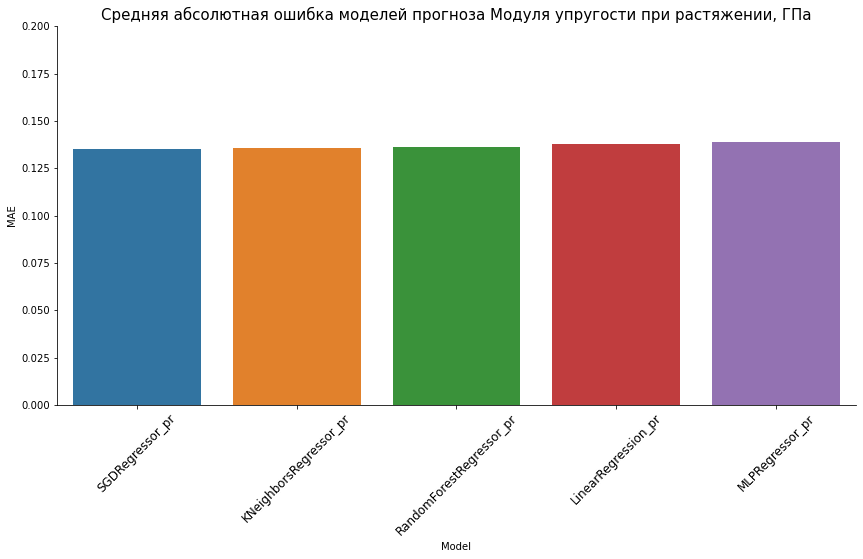

In [88]:
# Создание графика для средней абсолютной ошибки моделей прогноза параметра 'Модуля упругости при растяжении, ГПа'
sns.catplot(data=models_sort[0:5], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=0, ymax=0.2)
plt.xticks(size=12)
plt.xticks(fontsize = 12, rotation = 45)
plt.title('Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа', size=15)

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа')

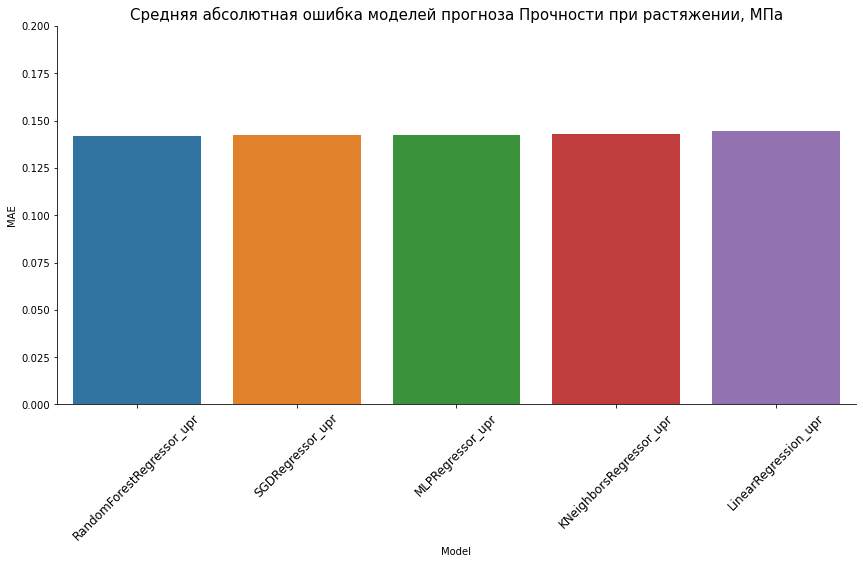

In [89]:
# Создание графика для средней абсолютной ошибки моделей прогноза параметра 'Прочности при растяжении, МПа'
sns.catplot(data=models_sort[5:10], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=0, ymax=0.2)
plt.xticks(size=12)
plt.xticks(fontsize = 12, rotation = 45)
plt.title('Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа', size=15)

Вывод: средние ошибки моделей прогноза примерно одинаковые

###### Построение нейронной сети на Keras

Построение нейронной сети на Keras для предсказания следующих параметров: Модуль упругости при растяжении, Прочность при растяжении, Соотношение матрица-наполнитель.

In [90]:
# Загрузка библиотеки tensorflow
import tensorflow as tf
# Загрузка модуля keras библиотеки tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Вывод версии библиотеки tensorflow
print(tf.__version__)

2.11.0


- Нейронная сеть для прогноза параметра Модуль упругости при растяжении

In [91]:
# Создание слоя, который выполняет нормализацию входных объектов
normalizer = tf.keras.layers.Normalization(axis=-1)

In [92]:
# Создание слоя, который выполняет нормализацию входных объектов
X_train_upr_norm = normalizer.adapt(np.array(X_train_upr))

1-ая нейронная сеть

In [93]:
# Вид модели - коллекция, стек слоев
model_upr0 = Sequential(X_train_upr_norm)
# Добавление слоев в модель
model_upr0.add(Dense(128))
model_upr0.add(BatchNormalization())
model_upr0.add(LeakyReLU())
model_upr0.add(Dense(64))
model_upr0.add(BatchNormalization())
model_upr0.add(LeakyReLU())
model_upr0.add(Dense(32))
model_upr0.add(BatchNormalization())
model_upr0.add(LeakyReLU())
model_upr0.add(Dense(1))
model_upr0.add(Activation(activation='elu'))

In [94]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_upr0.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [95]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_upr0 = model_upr0.fit(
    X_train_upr,
    y_train_upr,
    batch_size = 200,
    epochs=40,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/40
3/3 [==============================] - 2s 128ms/step - loss: 0.7442 - val_loss: 0.4521
Epoch 2/40
3/3 [==============================] - 0s 18ms/step - loss: 0.6433 - val_loss: 0.3520
Epoch 3/40
3/3 [==============================] - 0s 16ms/step - loss: 0.4727 - val_loss: 0.2245
Epoch 4/40
3/3 [==============================] - 0s 15ms/step - loss: 0.3211 - val_loss: 0.1440
Epoch 5/40
3/3 [==============================] - 0s 14ms/step - loss: 0.2800 - val_loss: 0.1286
Epoch 6/40
3/3 [==============================] - 0s 18ms/step - loss: 0.2840 - val_loss: 0.1411
Epoch 7/40
3/3 [==============================] - 0s 18ms/step - loss: 0.2065 - val_loss: 0.1987
Epoch 8/40
3/3 [==============================] - 0s 16ms/step - loss: 0.1901 - val_loss: 0.2348
Epoch 9/40
3/3 [==============================] - 0s 18ms/step - loss: 0.1954 - val_loss: 0.1969
Epoch 10/40
3/3 [==============================] - 0s 17ms/step - loss: 0.1586 - val_loss: 0.1549
Epoch 11/40
3/3 [===========

In [96]:
# Вывод архитектуры сети для upr
model_upr0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0

In [97]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

#Функция для построения точечного графика оригинального и предсказанного значения у   
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

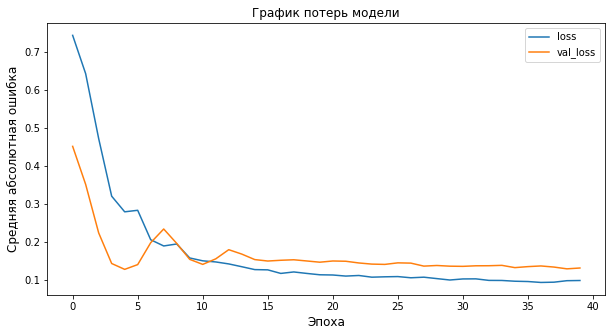

In [98]:
# Построение графика потерь модели
model_loss_plot(history_upr0)

10/10 [==============================] - 0s 1ms/step


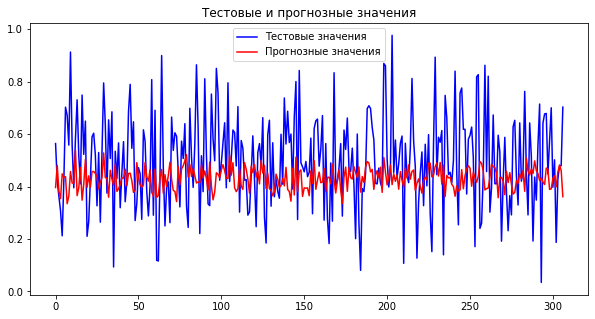

In [99]:
# Построение графика оригинального и прогнозного значения y
pred_upr = model_upr0.predict(np.array((X_test_upr)))
original_upr = y_test_upr.values
predicted_upr = pred_upr

actual_and_predicted_plot(original_upr, predicted_upr)

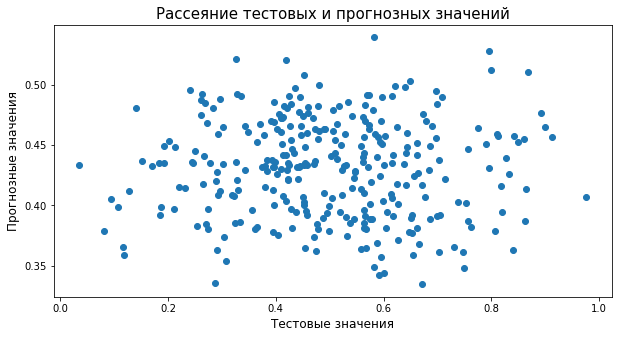

In [100]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_upr, predicted_upr)

In [101]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_upr0.evaluate(X_test_upr, y_test_upr, verbose=1)}')

10/10 [==============================] - 0s 1ms/step - loss: 0.1546
Model MAE: 0.1545780450105667


In [102]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_upr-np.mean(y_test_upr)))}')

MAE среднего значения: Модуль упругости при растяжении, ГПа    0.142124
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


2 нейронная сеть

In [103]:
# Вид модели - коллекция, стек слоев
model_upr = Sequential(X_train_upr_norm)
# Добавление слоев в модель
model_upr.add(Dense(128))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(1))
model_upr.add(Activation(activation='elu'))

In [104]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_upr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [105]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_upr = model_upr.fit(
    X_train_upr,
    y_train_upr,
    batch_size = 64,
    epochs=40,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/40
9/9 [==============================] - 3s 47ms/step - loss: 0.4076 - val_loss: 0.3860
Epoch 2/40
9/9 [==============================] - 0s 9ms/step - loss: 0.2394 - val_loss: 0.3666
Epoch 3/40
9/9 [==============================] - 0s 7ms/step - loss: 0.1680 - val_loss: 0.3220
Epoch 4/40
9/9 [==============================] - 0s 7ms/step - loss: 0.1513 - val_loss: 0.2653
Epoch 5/40
9/9 [==============================] - 0s 8ms/step - loss: 0.1384 - val_loss: 0.2445
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 0.1401 - val_loss: 0.2370
Epoch 7/40
9/9 [==============================] - 0s 7ms/step - loss: 0.1286 - val_loss: 0.1983
Epoch 8/40
9/9 [==============================] - 0s 8ms/step - loss: 0.1200 - val_loss: 0.1914
Epoch 9/40
9/9 [==============================] - 0s 8ms/step - loss: 0.1256 - val_loss: 0.1787
Epoch 10/40
9/9 [==============================] - 0s 9ms/step - loss: 0.1247 - val_loss: 0.1760
Epoch 11/40
9/9 [=====================

In [106]:
# Вывод архитектуры сети для upr
model_upr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64)               

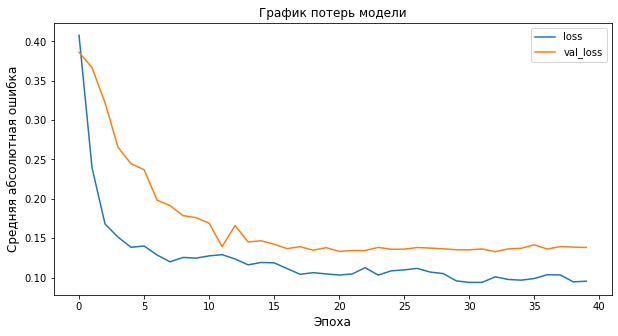

In [107]:
# Построение графика потерь модели
model_loss_plot(history_upr)

10/10 [==============================] - 0s 441us/step


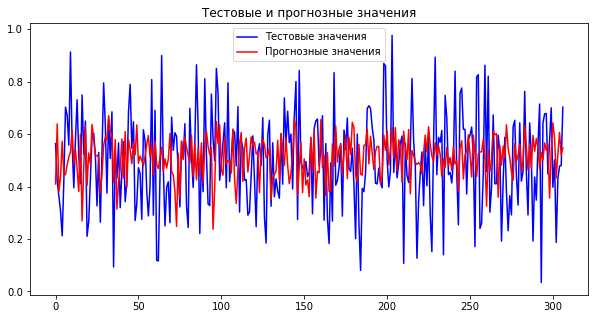

In [108]:
# Построение графика оригинального и прогнозного значения y
pred_upr = model_upr.predict(np.array((X_test_upr)))
original_upr = y_test_upr.values
predicted_upr = pred_upr

actual_and_predicted_plot(original_upr, predicted_upr)

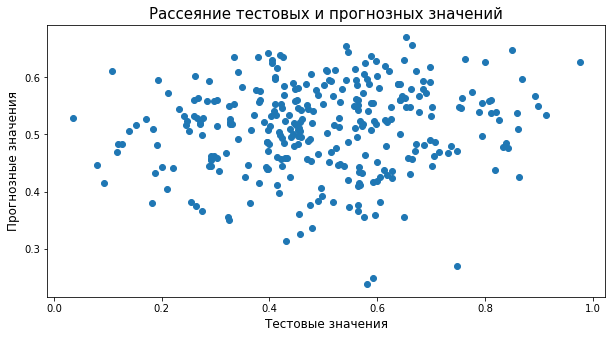

In [109]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_upr, predicted_upr)

In [110]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_upr.evaluate(X_test_upr, y_test_upr, verbose=1)}')

10/10 [==============================] - 0s 2ms/step - loss: 0.1500
Model MAE: 0.1500122845172882


In [111]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_upr-np.mean(y_test_upr)))}')

MAE среднего значения: Модуль упругости при растяжении, ГПа    0.142124
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


3-ья нейронная сеть

In [112]:
# Вид модели - коллекция, стек слоев
model_upr1 = Sequential(X_train_upr_norm)
# Добавление слоев в модель
model_upr1.add(Dense(256))
model_upr1.add(BatchNormalization())
model_upr1.add(LeakyReLU())
model_upr1.add(Dense(128))
model_upr1.add(BatchNormalization())
model_upr1.add(LeakyReLU())
model_upr1.add(Dense(128))
model_upr1.add(BatchNormalization())
model_upr1.add(LeakyReLU())
model_upr1.add(Dense(128))
model_upr1.add(BatchNormalization())
model_upr1.add(LeakyReLU())
model_upr1.add(Dense(64))
model_upr1.add(BatchNormalization())
model_upr1.add(LeakyReLU())
model_upr1.add(Dense(64))
model_upr1.add(BatchNormalization())
model_upr1.add(LeakyReLU())
model_upr1.add(Dense(64))
model_upr1.add(BatchNormalization())
model_upr1.add(LeakyReLU())
model_upr1.add(Dense(64))
model_upr1.add(BatchNormalization())
model_upr1.add(LeakyReLU())
model_upr1.add(Dense(32))
model_upr1.add(BatchNormalization())
model_upr1.add(LeakyReLU())
model_upr1.add(Dense(32))
model_upr1.add(BatchNormalization())
model_upr1.add(LeakyReLU())
model_upr1.add(Dense(32))
model_upr1.add(BatchNormalization())
model_upr1.add(LeakyReLU())
model_upr1.add(Dense(1))
model_upr1.add(Activation(activation='elu'))

In [113]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_upr1.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [114]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_upr1 = model_upr1.fit(
    X_train_upr,
    y_train_upr,
    batch_size = 200,
    epochs=100,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/100
3/3 [==============================] - 6s 294ms/step - loss: 0.7481 - val_loss: 0.4959
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 0.4080 - val_loss: 0.5351
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.2954 - val_loss: 0.5518
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 0.2635 - val_loss: 0.5256
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 0.2149 - val_loss: 0.4654
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.1723 - val_loss: 0.4115
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.1617 - val_loss: 0.3960
Epoch 8/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1348 - val_loss: 0.4046
Epoch 9/100
3/3 [==============================] - 0s 30ms/step - loss: 0.1270 - val_loss: 0.3995
Epoch 10/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1235 - val_loss: 0.3744
Epoch 11/100
3/3 [

Epoch 84/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0453 - val_loss: 0.1513
Epoch 85/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0479 - val_loss: 0.1399
Epoch 86/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0540 - val_loss: 0.1374
Epoch 87/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0487 - val_loss: 0.1411
Epoch 88/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0483 - val_loss: 0.1381
Epoch 89/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0469 - val_loss: 0.1350
Epoch 90/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0469 - val_loss: 0.1406
Epoch 91/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0444 - val_loss: 0.1369
Epoch 92/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0452 - val_loss: 0.1347
Epoch 93/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0434 - val_loss: 0.1362
Epoch 94/1

In [115]:
# Вывод архитектуры сети для upr
model_upr1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               3328      
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)              

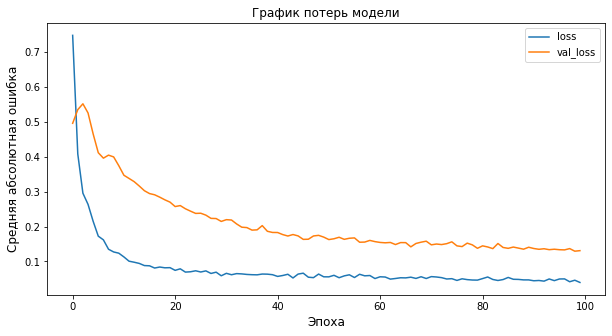

In [116]:
# Построение графика потерь модели
model_loss_plot(history_upr1)

10/10 [==============================] - 1s 2ms/step


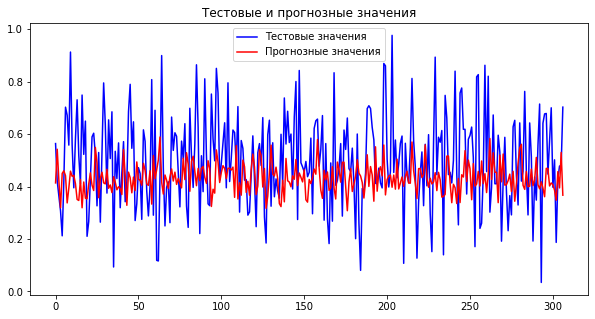

In [117]:
# Построение графика оригинального и прогнозного значения y
pred_upr = model_upr1.predict(np.array((X_test_upr)))
original_upr = y_test_upr.values
predicted_upr = pred_upr

actual_and_predicted_plot(original_upr, predicted_upr)

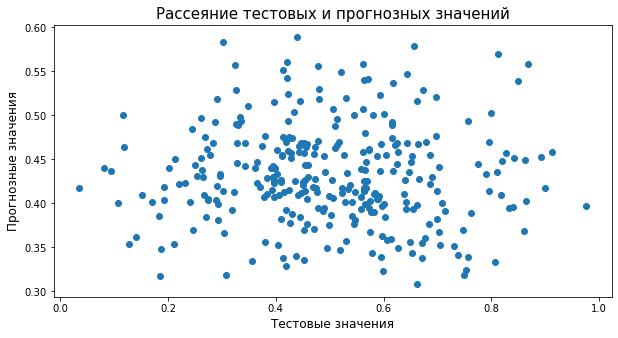

In [118]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_upr, predicted_upr)

In [119]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_upr1.evaluate(X_test_upr, y_test_upr, verbose=1)}')

10/10 [==============================] - 0s 3ms/step - loss: 0.1585
Model MAE: 0.1584782749414444


In [120]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_upr-np.mean(y_test_upr)))}')

MAE среднего значения: Модуль упругости при растяжении, ГПа    0.142124
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Вывод:

- Нейронная сеть для прогноза параметра Прочность при растяжении

In [121]:
# Получение данных в слой, который выполняет нормализацию входных объектов
X_train_pr_norm = normalizer.adapt(np.array(X_train_pr))

1-ая модель

In [122]:
# Вид модели - коллекция, стек слоев
model_pr0 = Sequential(X_train_pr_norm)
# Добавление слоев в модель
model_pr0.add(Dense(128))
model_pr0.add(BatchNormalization())
model_pr0.add(LeakyReLU())
model_pr0.add(Dense(64))
model_pr0.add(BatchNormalization())
model_pr0.add(LeakyReLU())
model_pr0.add(Dense(32))
model_pr0.add(BatchNormalization())
model_pr0.add(LeakyReLU())
model_pr0.add(Dense(1))
model_pr0.add(Activation('selu'))

In [123]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_pr0 = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [124]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_pr0.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [127]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_pr0 = model_pr0.fit(
    X_train_pr,
    y_train_pr,
    batch_size = 32,
    epochs=300,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr0])

Epoch 1/300
18/18 [==============================] - 2s 19ms/step - loss: 1.0956 - val_loss: 0.2817
Epoch 2/300
18/18 [==============================] - 0s 4ms/step - loss: 0.6703 - val_loss: 0.1595
Epoch 3/300
18/18 [==============================] - 0s 4ms/step - loss: 0.3623 - val_loss: 0.1448
Epoch 4/300
18/18 [==============================] - 0s 4ms/step - loss: 0.2767 - val_loss: 0.1480
Epoch 5/300
18/18 [==============================] - 0s 5ms/step - loss: 0.2338 - val_loss: 0.1506
Epoch 6/300
18/18 [==============================] - 0s 4ms/step - loss: 0.2310 - val_loss: 0.1525
Epoch 7/300
18/18 [==============================] - 0s 4ms/step - loss: 0.2048 - val_loss: 0.1563
Epoch 8/300
18/18 [==============================] - 0s 4ms/step - loss: 0.1902 - val_loss: 0.1524
Epoch 9/300
18/18 [==============================] - 0s 4ms/step - loss: 0.1777 - val_loss: 0.1535
Epoch 10/300
18/18 [==============================] - 0s 4ms/step - loss: 0.1864 - val_loss: 0.1522
Epoch 11

In [128]:
# Вывод архитектуры сети для pr
model_pr0.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_19 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_20 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 64)               

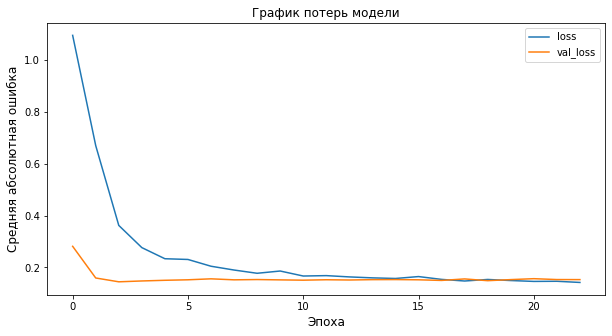

In [129]:
# Построение графика потерь модели
model_loss_plot(history_pr0)

10/10 [==============================] - 0s 1ms/step


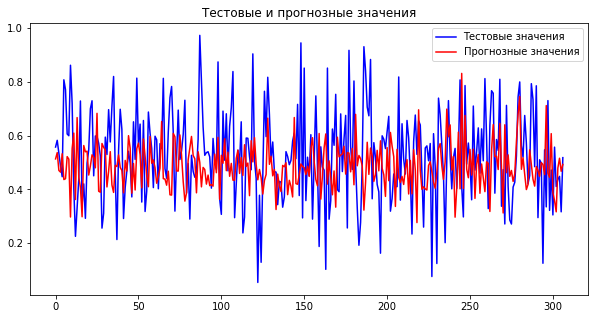

In [130]:
# Построение графика оригинального и прогнозного значения y
pred_pr = model_pr0.predict(np.array((X_test_pr)))
original_pr = y_test_pr.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

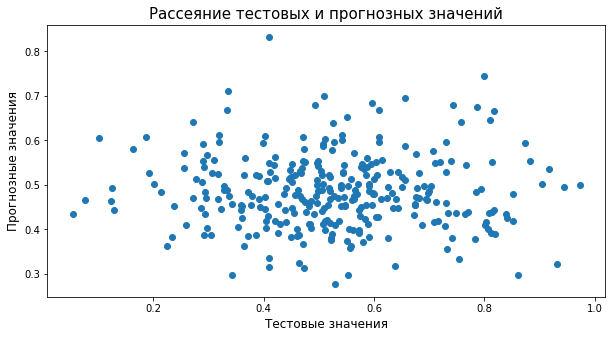

In [131]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_pr, predicted_pr)

In [132]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_pr0.evaluate(X_test_pr, y_test_pr)}')

10/10 [==============================] - 0s 2ms/step - loss: 0.1539
Model MAE: 0.15392054617404938


In [133]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_pr-np.mean(y_test_pr)))}')

MAE среднего значения: Прочность при растяжении, МПа    0.133637
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


2-ая модель

In [134]:
# Вид модели - коллекция, стек слоев
model_pr = Sequential(X_train_pr_norm)
# Добавление слоев в модель
model_pr.add(Dense(128))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(1))
model_pr.add(Activation('selu'))

In [135]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_pr = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [136]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_pr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [137]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_pr = model_pr.fit(
    X_train_pr,
    y_train_pr,
    batch_size = 32,
    epochs=300,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr])

Epoch 1/300
18/18 [==============================] - 3s 22ms/step - loss: 0.6392 - val_loss: 0.3643
Epoch 2/300
18/18 [==============================] - 0s 5ms/step - loss: 0.3670 - val_loss: 0.2506
Epoch 3/300
18/18 [==============================] - 0s 4ms/step - loss: 0.3080 - val_loss: 0.2096
Epoch 4/300
18/18 [==============================] - 0s 4ms/step - loss: 0.2539 - val_loss: 0.1985
Epoch 5/300
18/18 [==============================] - 0s 5ms/step - loss: 0.2406 - val_loss: 0.1936
Epoch 6/300
18/18 [==============================] - 0s 5ms/step - loss: 0.2157 - val_loss: 0.1707
Epoch 7/300
18/18 [==============================] - 0s 5ms/step - loss: 0.2222 - val_loss: 0.1695
Epoch 8/300
18/18 [==============================] - 0s 5ms/step - loss: 0.2073 - val_loss: 0.1628
Epoch 9/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1982 - val_loss: 0.1518
Epoch 10/300
18/18 [==============================] - 0s 4ms/step - loss: 0.1943 - val_loss: 0.1597
Epoch 11

In [138]:
# Вывод архитектуры сети для pr
model_pr.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_22 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_23 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 64)               

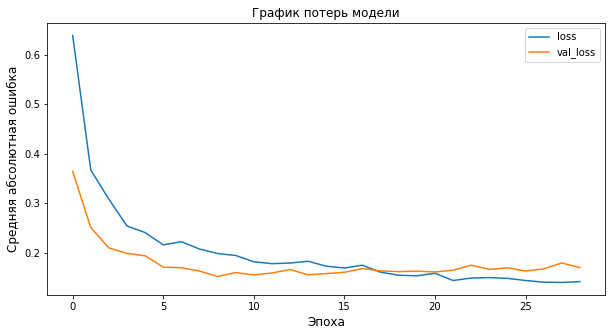

In [139]:
# Построение графика потерь модели
model_loss_plot(history_pr)

10/10 [==============================] - 0s 2ms/step


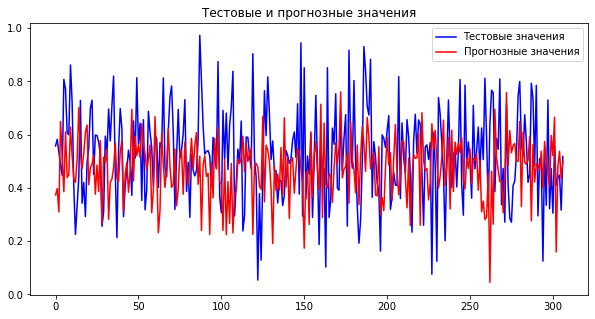

In [140]:
# Построение графика оригинального и прогнозного значения y
pred_pr = model_pr.predict(np.array((X_test_pr)))
original_pr = y_test_pr.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

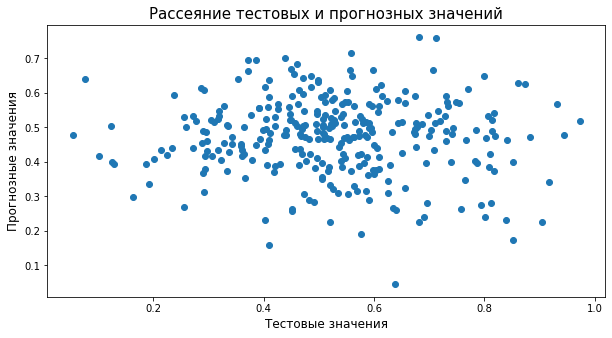

In [141]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_pr, predicted_pr)

In [142]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_pr.evaluate(X_test_pr, y_test_pr)}')

10/10 [==============================] - 0s 986us/step - loss: 0.1681
Model MAE: 0.16811972856521606


In [143]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_pr-np.mean(y_test_pr)))}')

MAE среднего значения: Прочность при растяжении, МПа    0.133637
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


3-ья модель

In [144]:
# Вид модели - коллекция, стек слоев
model_pr1 = Sequential(X_train_pr_norm)
# Добавление слоев в модель
model_pr1.add(Dense(128))
model_pr1.add(BatchNormalization())
model_pr1.add(LeakyReLU())
model_pr1.add(Dense(64))
model_pr1.add(BatchNormalization())
model_pr1.add(LeakyReLU())
model_pr1.add(Dense(64))
model_pr1.add(BatchNormalization())
model_pr1.add(LeakyReLU())
model_pr1.add(Dense(64))
model_pr1.add(BatchNormalization())
model_pr1.add(LeakyReLU())
model_pr1.add(Dense(32))
model_pr1.add(BatchNormalization())
model_pr1.add(LeakyReLU())
model_pr1.add(Dense(32))
model_pr1.add(BatchNormalization())
model_pr1.add(LeakyReLU())
model_pr1.add(Dense(32))
model_pr1.add(BatchNormalization())
model_pr1.add(LeakyReLU())
model_pr1.add(Dense(1))
model_pr1.add(Activation('selu'))

In [148]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_pr1 = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [149]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_pr1.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [150]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_pr1 = model_pr1.fit(
    X_train_pr,
    y_train_pr,
    batch_size = 32,
    epochs=300,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr1])

Epoch 1/300
18/18 [==============================] - 4s 25ms/step - loss: 0.1312 - val_loss: 0.1632
Epoch 2/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1191 - val_loss: 0.1598
Epoch 3/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1162 - val_loss: 0.1634
Epoch 4/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1164 - val_loss: 0.1619
Epoch 5/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1201 - val_loss: 0.1630
Epoch 6/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1173 - val_loss: 0.1651
Epoch 7/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1179 - val_loss: 0.1622
Epoch 8/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1227 - val_loss: 0.1576
Epoch 9/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1204 - val_loss: 0.1600
Epoch 10/300
18/18 [==============================] - 0s 6ms/step - loss: 0.1177 - val_loss: 0.1644
Epoch 11

In [151]:
# Вывод архитектуры сети для pr
model_pr1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_26 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_27 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 64)               

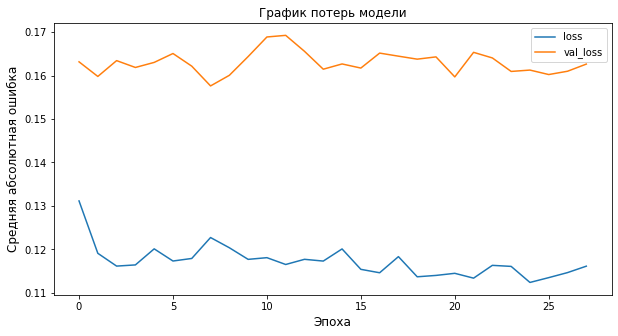

In [152]:
# Построение графика потерь модели
model_loss_plot(history_pr1)

10/10 [==============================] - 0s 2ms/step


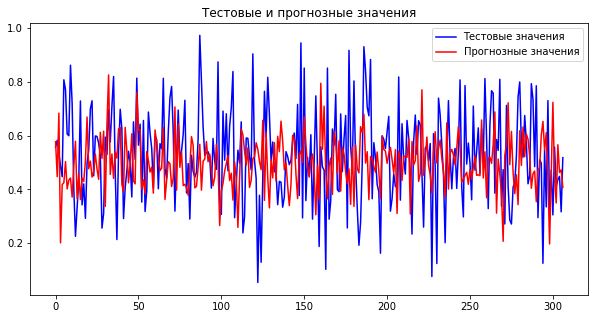

In [153]:
# Построение графика оригинального и прогнозного значения y
pred_pr = model_pr1.predict(np.array((X_test_pr)))
original_pr = y_test_pr.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

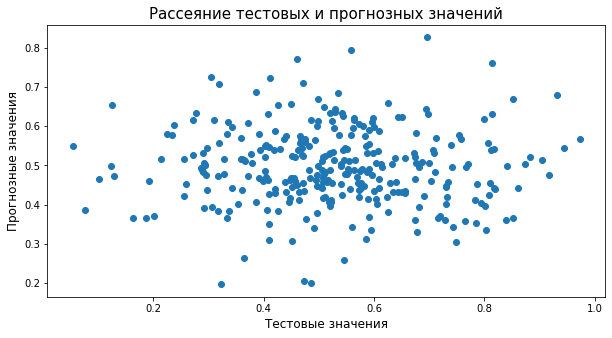

In [154]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_pr, predicted_pr)

In [155]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_pr1.evaluate(X_test_pr, y_test_pr)}')

10/10 [==============================] - 0s 2ms/step - loss: 0.1591
Model MAE: 0.15913990139961243


In [156]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_pr-np.mean(y_test_pr)))}')

MAE среднего значения: Прочность при растяжении, МПа    0.133637
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Вывод:

- Нейронная сеть для предсказания параметра Соотношение матрица-наполнитель

In [157]:
# Назначение переменных для создания модели
x_mn = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df[['Соотношение матрица-наполнитель']]
# Разбиение данных на обучающую и тестовую выборки
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=5)

In [158]:
# Получение данных в слой, который выполняет нормализацию входных объектов
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

1-ая модель

In [159]:
# Вид модели - коллекция, стек слоев
model_mn0 = Sequential(X_train_mn_norm)
# Добавление слоев в модель
model_mn0.add(Dense(128))
model_mn0.add(BatchNormalization())
model_mn0.add(LeakyReLU())
model_mn0.add(Dense(64, activation='selu'))
model_mn0.add(BatchNormalization())
model_mn0.add(Dense(32, activation='selu'))
model_mn0.add(BatchNormalization())
model_mn0.add(LeakyReLU())
model_mn0.add(Dense(1))
model_mn0.add(Activation('selu'))

In [160]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_mn0 = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [161]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_mn0.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [167]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_mn0 = model_mn0.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn0]
    )

Epoch 1/100
9/9 [==============================] - 2s 41ms/step - loss: 0.4420 - val_loss: 0.1864
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2568 - val_loss: 0.2163
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2282 - val_loss: 0.1729
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2268 - val_loss: 0.2099
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1977 - val_loss: 0.2036
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.1836 - val_loss: 0.1971
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1690 - val_loss: 0.2047
Epoch 8/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1714 - val_loss: 0.1880
Epoch 9/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1583 - val_loss: 0.2009
Epoch 10/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1566 - val_loss: 0.1941
Epoch 11/100
9/9 [==========

In [168]:
# Вывод архитектуры сети для mn
model_mn0.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_33 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_33 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_34 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_41 (Dense)            (None, 32)               

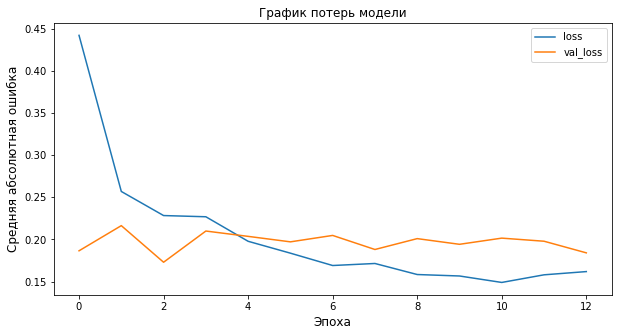

In [169]:
# Построение графика потерь модели
model_loss_plot(history_mn0)

10/10 [==============================] - 0s 2ms/step


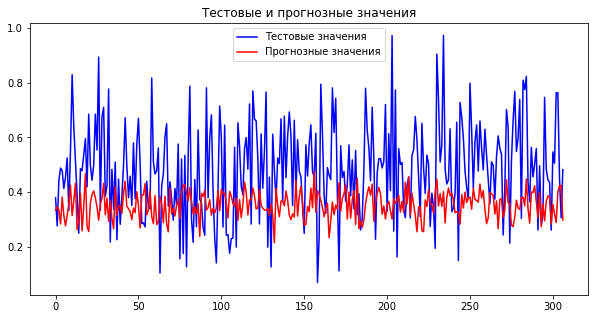

In [170]:
# Построение графика оригинального и прогнозного значения y
pred_mn = model_mn0.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

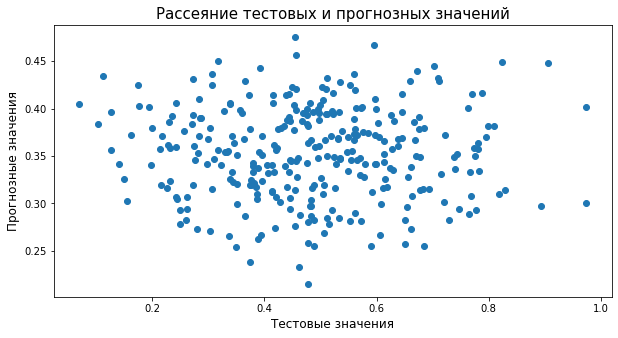

In [171]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_mn, predicted_mn)

In [172]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_mn0.evaluate(X_test_mn, y_test_mn)}')

10/10 [==============================] - 0s 3ms/step - loss: 0.1780
Model MAE: 0.1779647171497345


In [173]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_mn-np.mean(y_test_mn)))}')

MAE среднего значения: Соотношение матрица-наполнитель    0.13474
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


2-ая модель

In [174]:
# Вид модели - коллекция, стек слоев
model_mn = Sequential(X_train_mn_norm)
# Добавление слоев в модель
model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(128, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(64, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(32, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(16, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [175]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [176]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [177]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn]
    )

Epoch 1/100
9/9 [==============================] - 3s 48ms/step - loss: 0.9005 - val_loss: 0.2161
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3539 - val_loss: 0.1937
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2045 - val_loss: 0.1938
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.1756 - val_loss: 0.2068
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1604 - val_loss: 0.2203
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1545 - val_loss: 0.2079
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1517 - val_loss: 0.2023
Epoch 8/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1451 - val_loss: 0.2196
Epoch 9/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1434 - val_loss: 0.2283
Epoch 10/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1358 - val_loss: 0.2284
Epoch 11/100
9/9 [==========

In [178]:
# Вывод архитектуры сети для mn
model_mn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_36 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_37 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_45 (Dense)            (None, 64)               

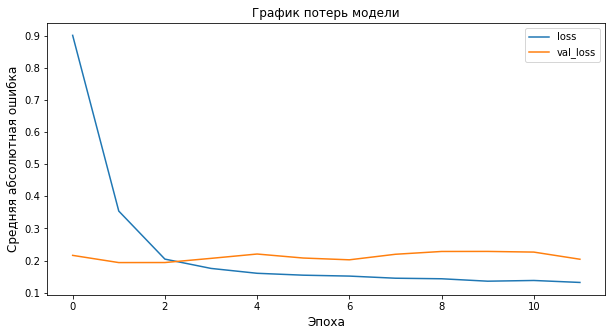

In [179]:
# Построение графика потерь модели
model_loss_plot(history_mn)

10/10 [==============================] - 0s 2ms/step


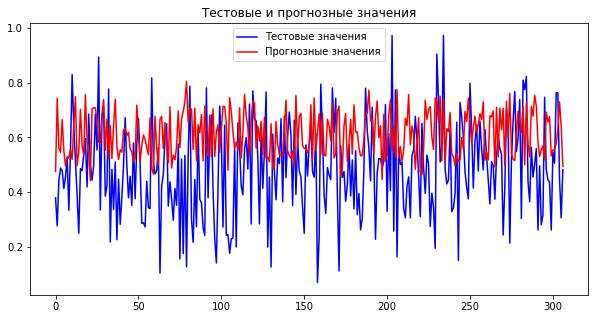

In [180]:
# Построение графика оригинального и прогнозного значения y
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

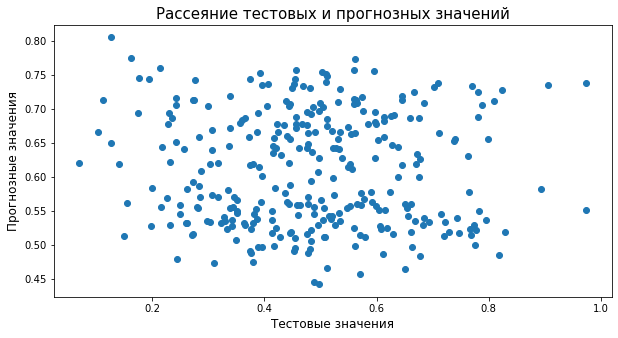

In [181]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_mn, predicted_mn)

In [182]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_mn.evaluate(X_test_mn, y_test_mn)}')

10/10 [==============================] - 0s 612us/step - loss: 0.1868
Model MAE: 0.18683291971683502


In [183]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_mn-np.mean(y_test_mn)))}')

MAE среднего значения: Соотношение матрица-наполнитель    0.13474
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


3-ья модель

In [191]:
# Вид модели - коллекция, стек слоев
model_mn1 = Sequential(X_train_mn_norm)
# Добавление слоев в модель
model_mn1.add(Dense(128))
model_mn1.add(BatchNormalization())
model_mn1.add(LeakyReLU())
model_mn1.add(Dense(128, activation='selu'))
model_mn1.add(BatchNormalization())
model_mn1.add(Dense(64, activation='selu'))
model_mn1.add(BatchNormalization())
model_mn1.add(Dense(64, activation='selu'))
model_mn1.add(BatchNormalization())
model_mn1.add(Dense(32, activation='selu'))
model_mn1.add(BatchNormalization())
model_mn1.add(Dense(32, activation='selu'))
model_mn1.add(BatchNormalization())
model_mn1.add(Dense(16, activation='selu'))
model_mn1.add(BatchNormalization())
model_mn1.add(Dense(16, activation='selu'))
model_mn1.add(BatchNormalization())
model_mn1.add(LeakyReLU())
model_mn1.add(Dense(1))
model_mn1.add(Activation('selu'))

In [192]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_mn1 = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [193]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_mn1.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [194]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_mn1 = model_mn1.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn1]
    )

Epoch 1/100
9/9 [==============================] - 4s 61ms/step - loss: 0.3838 - val_loss: 0.5777
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.2113 - val_loss: 0.5423
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1964 - val_loss: 0.4458
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1739 - val_loss: 0.3159
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1683 - val_loss: 0.3729
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1456 - val_loss: 0.2886
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1474 - val_loss: 0.3114
Epoch 8/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1476 - val_loss: 0.2850
Epoch 9/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1397 - val_loss: 0.2900
Epoch 10/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1446 - val_loss: 0.2705
Epoch 11/100
9/9 [========

In [195]:
# Вывод архитектуры сети для mn
model_mn1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_49 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_39 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_59 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_50 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_60 (Dense)            (None, 64)               

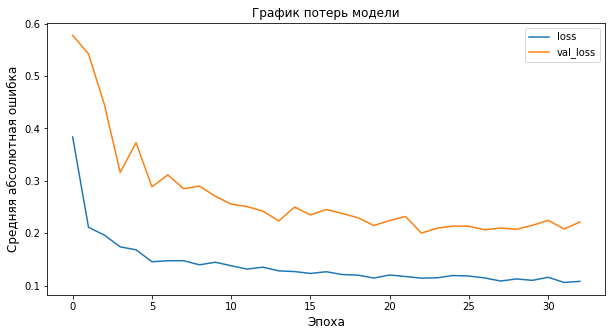

In [196]:
# Построение графика потерь модели
model_loss_plot(history_mn1)

10/10 [==============================] - 0s 2ms/step


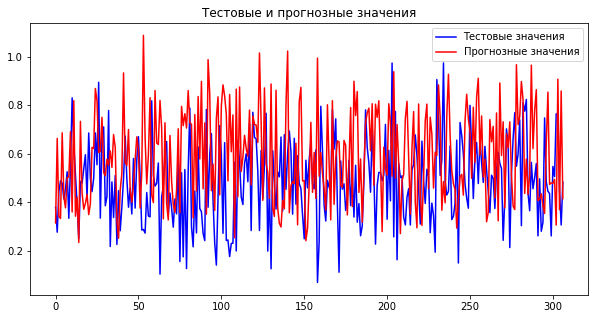

In [197]:
# Построение графика оригинального и прогнозного значения y
pred_mn = model_mn1.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

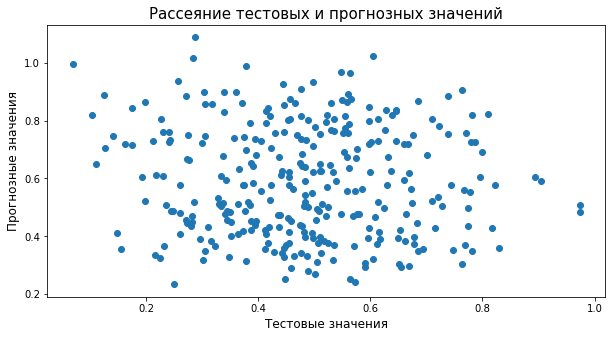

In [198]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_mn, predicted_mn)

In [199]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_mn1.evaluate(X_test_mn, y_test_mn)}')

10/10 [==============================] - 0s 2ms/step - loss: 0.2264
Model MAE: 0.22642308473587036


In [200]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_mn-np.mean(y_test_mn)))}')

MAE среднего значения: Соотношение матрица-наполнитель    0.13474
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Вывод: